# Predicting Loan Defaults for Small Business Loans


## Context


Small Business Administration (SBA) is a government agency that has delivered millions of loans, loan guarantees, contracts, counseling sessions and other forms of assistance to small businesses since 1953. 

SBA offers a variety of loan programs for very specific purposes - the most common program is the general small business loans (7(a) program). SBA does NOT provide grants for starting and expanding a business - it provides guarantees on loans that are distributed by lending institutions, thus reducing the risk to those institutions. 

7(a) loans have a maximum loan amount of \$5 million.  The average 7(a) loan amount in fiscal year 2015 was \$371,628. The actual interest rate for a 7(a) loan guaranteed by the SBA is negotiated between the applicant and lender and subject to the SBA maximums plus some spread, and not available for the data analyzed here.

SBA can guarantee as much as 85 percent on loans of up to \$150,000 and 75 percent on loans of more than \$150,000. SBA’s maximum exposure amount is \$3,750,000. 



## Problem

SBA provides assistance to small businesses to let them start new operations, expand existing ones, or recover after natural disasters. However (as can be seen below) a significant portion of SBA-backed loans default.
1. Can we predict which loans will be repaid? 
2. What are the factors that are predictive of default? 

## Exploratory Data Analysis + Data Cleaning

## Data - Part 1.
As a part of the "Open Government" policy, SBA has released a loan-level list of all 7(a) loans approved since October 1990 (Fiscal Year 1991 - Present). These are released as multiple Excel files. We will first load these using Pandas and then save them for easier/quicker access later. 

In [1]:
# Import necessary Python packages 

# Data analysis tools
import numpy as np
import pandas as pd
import datetime
from dateutil.relativedelta import relativedelta

# Plotting tools
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import graphviz 


In [2]:
# Load the data (3 parts)
#loans_7a_part1 = pd.read_excel('FOIA - 7(a)(FY1991-FY1999).xlsx', skiprows = 1)

In [3]:
#loans_7a_part2 = pd.read_excel('FOIA - 7(a)(FY2000-FY2009).xlsx', skiprows = 1)

In [4]:
#loans_7a_part3 = pd.read_excel('FOIA - 7(a)(FY2010-Present).xlsx', skiprows = 1)

In [5]:
# Concatenate the data
#loans_7a = pd.concat([loans_7a_part1, loans_7a_part2, loans_7a_part3])

In [6]:
# Save for quicker access later
#loans_7a.to_pickle('loans_7a')

In [7]:
# Read in the raw data 
loans_7a = pd.read_pickle('loans_7a')

In [8]:
list(loans_7a.columns)

['Program',
 'BorrName',
 'BorrStreet',
 'BorrCity',
 'BorrState',
 'BorrZip',
 'BankName',
 'BankStreet',
 'BankCity',
 'BankState',
 'BankZip',
 'GrossApproval',
 'SBAGuaranteedApproval',
 'ApprovalDate',
 'ApprovalFiscalYear',
 'FirstDisbursementDate',
 'DeliveryMethod',
 'subpgmdesc',
 'InitialInterestRate',
 'TermInMonths',
 'NaicsCode',
 'NaicsDescription',
 'FranchiseCode',
 'FranchiseName',
 'ProjectCounty',
 'ProjectState',
 'SBADistrictOffice',
 'CongressionalDistrict',
 'BusinessType',
 'LoanStatus',
 'ChargeOffDate',
 'GrossChargeOffAmount',
 'RevolverStatus',
 'JobsSupported']

In [9]:
loans_7a.describe()

,BorrZip,GrossApproval,SBAGuaranteedApproval,ApprovalFiscalYear,InitialInterestRate,TermInMonths,NaicsCode,FranchiseCode,CongressionalDistrict,GrossChargeOffAmount,RevolverStatus,JobsSupported
count,1.444020e+06,1.444020e+06,1.444020e+06,1.444020e+06,453262.000000,1.444020e+06,1.241195e+06,1.444020e+06,1.433569e+06,1.444020e+06,1.444020e+06,1.444020e+06
mean,5.225015e+04,2.404600e+05,1.768696e+05,2.005233e+03,6.259969,1.097951e+02,5.214967e+05,2.526164e+03,1.037184e+01,1.251509e+04,2.570678e-01,7.198887e+00
std,3.150702e+04,4.292367e+05,3.263411e+05,6.912574e+00,1.398681,7.708278e+01,1.739744e+05,1.186865e+04,1.133274e+01,6.849460e+04,4.370172e-01,2.974551e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,1.991000e+03,0.000000,0.000000e+00,1.111100e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.240600e+04,3.500000e+04,2.000000e+04,2.000000e+03,5.450000,6.000000e+01,4.244600e+05,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.370400e+04,9.850000e+04,6.035000e+04,2.006000e+03,6.000000,8.400000e+01,5.311100e+05,1.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
75%,8.090700e+04,2.500000e+05,1.825192e+05,2.011000e+03,6.990000,1.200000e+02,6.244100e+05,1.000000e+00,1.300000e+01,0.000000e+00,1.000000e+00,7.000000e+00
max,9.999900e+04,5.000000e+06,5.250000e+06,2.017000e+03,56.000000,8.470000e+02,9.999900e+05,9.308600e+04,5.300000e+01,3.512596e+06,1.000000e+00,9.500000e+03


In [10]:
# Check the number of NaN's (or missing values) for each column
loans_7a.isnull().sum()

Program                        0
BorrName                      52
BorrStreet                   132
BorrCity                      25
BorrState                     28
BorrZip                        0
BankName                       0
BankStreet                  2046
BankCity                    2046
BankState                   2108
BankZip                     2096
GrossApproval                  0
SBAGuaranteedApproval          0
ApprovalDate                   0
ApprovalFiscalYear             0
FirstDisbursementDate     194718
DeliveryMethod                30
subpgmdesc                     0
InitialInterestRate       990758
TermInMonths                   0
NaicsCode                 202825
NaicsDescription          236519
FranchiseCode                  0
FranchiseName            1351534
ProjectCounty                656
ProjectState                  58
SBADistrictOffice             25
CongressionalDistrict      10451
BusinessType                  77
LoanStatus                     0
ChargeOffD

In [11]:
# Examine the first 10 rows
loans_7a.head(10)

,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BankName,BankStreet,BankCity,BankState,...,ProjectCounty,ProjectState,SBADistrictOffice,CongressionalDistrict,BusinessType,LoanStatus,ChargeOffDate,GrossChargeOffAmount,RevolverStatus,JobsSupported
0,7A,TECHNIGRAPHICS,1880 PARKWAY BLVD.,WEST VALLEY,UT,84119,Bank of the West,180 Montgomery St,SAN FRANCISCO,CA,...,SALT LAKE,UT,UTAH DISTRICT OFFICE,4.0,PARTNERSHIP,PIF,NaT,0,0,0
1,7A,RUTH M. AND RONALD E. RIVARD,36 CABOT ROAD,MERRIMACK,NH,3054,MISSINGMAINBANKID,NaN,NaN,NaN,...,HILLSBOROUGH,NH,NEW HAMPSHIRE DISTRICT OFFICE,1.0,INDIVIDUAL,CANCLD,NaT,0,0,0
2,7A,"FOUR SEASONS PLANT CTR., INC.",222 S. POPE ST.,BRECKENRIDGE,MN,56520,Bank of the West,180 Montgomery St,SAN FRANCISCO,CA,...,WILKIN,MN,MINNESOTA DISTRICT OFFICE,7.0,CORPORATION,PIF,NaT,0,0,0
3,7A,Michael Davis,P O BOX 1457,FOND DU LAC,WI,54936,U.S. Bank National Association,425 Walnut St,Cincinnati,OH,...,FOND DU LAC,WI,MILWAUKEE,6.0,CORPORATION,PIF,NaT,0,0,0
4,7A,"ROBINS INSURANCE AGENCY, INC.",30 BURTON HILLS BLVD.,NASHVILLE,TN,37215,SunTrust Bank,25 Park Place NE,ATLANTA,GA,...,DAVIDSON,TN,TENNESSEE DISTRICT OFFICE,5.0,CORPORATION,PIF,NaT,0,0,0
5,7A,"REHABILITATION ADVISORS, INC",445 WYMORE ROAD STE 220,WINTER PARK,FL,32789,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,...,ORANGE,FL,NORTH FLORIDA DISTRICT OFFICE,7.0,CORPORATION,PIF,NaT,0,0,0
6,7A,"NEW ERA, INC.",1255 PARADISE HILL ROAD,CLARKSVILLE,TN,37041,"First Tennessee Bank, National Association","165 Madison Ave, 1st Fl",MEMPHIS,TN,...,MONTGOMERY,TN,TENNESSEE DISTRICT OFFICE,7.0,CORPORATION,PIF,NaT,0,0,0
7,7A,"GBR, INC. & GERALD H & BONITA",1103 SPRUCE,YANKTON,SD,57078,CorTrust Bank National Association,100 E Havens Ave,MITCHELL,SD,...,YANKTON,SD,SOUTH DAKOTA DISTRICT OFFICE,0.0,INDIVIDUAL,PIF,NaT,0,0,0
8,7A,"MICRO-PACE COMPUTERS, INC.","604 N. COUNTRY FAIR DRIVE, S",CHAMPAIGN,IL,61821,"Central Illinois Bank, A Branch of",2913 W Kirby Ave,CHAMPAIGN,IL,...,CHAMPAIGN,IL,SPRINGFIELD BRANCH OFFICE,13.0,CORPORATION,PIF,NaT,0,0,0
9,7A,"M.C. INTERNATIONAL, INC",1100-B TUCKAHOE DRIVE,NASHVILLE,TN,37207,"First Tennessee Bank, National Association","165 Madison Ave, 1st Fl",MEMPHIS,TN,...,DAVIDSON,TN,TENNESSEE DISTRICT OFFICE,5.0,CORPORATION,PIF,NaT,0,0,0


### Target Variable:
Loan Status/Charged Off Amount 

Limit data to only those loans that have been completed (paid in full or defaulted/charfed off) or to 
completed loans that have matured?

In [12]:
loans_7a['LoanStatus'].value_counts()

PIF       781877
EXEMPT    273406
CHGOFF    193618
CANCLD    171998
COMMIT     23121
Name: LoanStatus, dtype: int64

1. PIF = paid in full
2. CHGOFF = charged off / defaulted
3. CANCLD = cancelled
4. COMMIT = commited but not disbursed
5. EXEMPT = exempt, usually loans that are still in the process of being paid off

### Potentially useful features:
Borrower Location (State), Bank (?), Gross Approval, SBA Guaranteed Approval, Approval Fiscal Year,  Term In Months, NAICS Code, Franchise Code, Business Type, Revolver Status, Jobs Supported

In [13]:
loans_7a.columns

Index(['Program', 'BorrName', 'BorrStreet', 'BorrCity', 'BorrState', 'BorrZip',
       'BankName', 'BankStreet', 'BankCity', 'BankState', 'BankZip',
       'GrossApproval', 'SBAGuaranteedApproval', 'ApprovalDate',
       'ApprovalFiscalYear', 'FirstDisbursementDate', 'DeliveryMethod',
       'subpgmdesc', 'InitialInterestRate', 'TermInMonths', 'NaicsCode',
       'NaicsDescription', 'FranchiseCode', 'FranchiseName', 'ProjectCounty',
       'ProjectState', 'SBADistrictOffice', 'CongressionalDistrict',
       'BusinessType', 'LoanStatus', 'ChargeOffDate', 'GrossChargeOffAmount',
       'RevolverStatus', 'JobsSupported'],
      dtype='object')

In [14]:
# Remove irrelevant features
loans_7a.drop(['Program', 'BorrName', 'BorrStreet', 'BorrCity', 'BorrZip', 'BankStreet',  'BankCity', 'BankState',                
                'BankZip', 'NaicsDescription', 'FranchiseName', 'ProjectCounty', 'ProjectState',
               'SBADistrictOffice', 'CongressionalDistrict'], axis = 1, inplace = True)


In [15]:
loans_7a.columns

Index(['BorrState', 'BankName', 'GrossApproval', 'SBAGuaranteedApproval',
       'ApprovalDate', 'ApprovalFiscalYear', 'FirstDisbursementDate',
       'DeliveryMethod', 'subpgmdesc', 'InitialInterestRate', 'TermInMonths',
       'NaicsCode', 'FranchiseCode', 'BusinessType', 'LoanStatus',
       'ChargeOffDate', 'GrossChargeOffAmount', 'RevolverStatus',
       'JobsSupported'],
      dtype='object')

In [16]:
# Since initial interest rate is missing in 990758 rows, remove it
loans_7a.drop('InitialInterestRate', axis = 1, inplace = True)

In [17]:
# Most frequent banks
#loans_7a['BankName'].value_counts()


### Approval amount and guaranteed amount are highly correlated! 

In [18]:
loans_7a['GrossApproval'].corr(loans_7a['SBAGuaranteedApproval'])

0.99203049820361355

In [19]:
loans_7a.drop('GrossApproval', axis = 1, inplace = True)

In [20]:
loans_7a['BusinessType'].value_counts()


CORPORATION    1058519
INDIVIDUAL      334710
PARTNERSHIP      50714
Name: BusinessType, dtype: int64

In [21]:
loans_7a['FranchiseCode'].value_counts().head(10)


1        745759
0        605775
78760      4725
68020      2603
50564      1269
21780      1245
25650      1129
17998       943
24850       718
22470       685
Name: FranchiseCode, dtype: int64

### Franchise code is 0 or 1 for non-franchises and a 5-digit code otherwise! Only 6.4% of approved loans were to franchises!

In [22]:
# Percent of franchises
(loans_7a['FranchiseCode'] > 1).sum()/len(loans_7a)*100

6.4047589368568305

In [23]:
# Turn franchise code into a binary variable
def binarizeFranCode(code):
    if code > 1:
        return 1
    else:
        return 0

In [24]:
loans_7a['FranchiseCodeBin'] = loans_7a['FranchiseCode'].apply(binarizeFranCode)

In [25]:
loans_7a['FranchiseCodeBin'].value_counts()

0    1351534
1      92486
Name: FranchiseCodeBin, dtype: int64

In [26]:
loans_7a.drop('FranchiseCode', axis = 1, inplace = True)

The North American Industry Classification System (NAICS) 
 classifies business establishments based on the activities in which they are primarily engaged.
 ### There are more than 1300 different NAICS values in this dataset!

In [27]:
loans_7a['NaicsCode'].nunique()

1380

In [28]:
loans_7a['NaicsCode'].isnull().sum()

202825

In [29]:
# Remove rows with missing NAICS Codes
loans_7a.dropna(subset = ['NaicsCode'], inplace = True)

In [30]:
loans_7a.reset_index(drop = True, inplace = True)

### Completed vs. Matured Loans

In [31]:
# Replace CHGOFF with DEFAULT for simplicity 
def repCHGOFF_DEFAULT(status):
    if status == 'CHGOFF':
        return 'DEFAULT'
    else:
        return status
loans_7a['LoanStatus'] = loans_7a['LoanStatus'].apply(repCHGOFF_DEFAULT)

In [32]:
loans_7a['LoanStatus'].value_counts()

PIF        630223
EXEMPT     272143
DEFAULT    170653
CANCLD     145055
COMMIT      23121
Name: LoanStatus, dtype: int64

In [33]:
# Percent of loans that defaulted out of all PIF or DEFAULT loans
loans_7a['LoanStatus'].value_counts()['DEFAULT']/(loans_7a['LoanStatus'].value_counts()['DEFAULT'] + loans_7a['LoanStatus'].value_counts()['PIF'])

0.21308292419800318

## Data - Part 2.
As a an indicator of economic state at the time a loan is awarded, use S&P 1500 composite index.
Source: http://www.econ.yale.edu/~shiller/data.htm

In [34]:
# Load monthly consumer price index and composite S&P index 
cpi_sp = pd.read_excel('ie_data.xls', sep = ' ', skiprows=7)
# use only values starting in 1990
cpi_sp  = cpi_sp[cpi_sp['Date']>1989]

In [35]:
# keep only relevant columns: date (year+month), S&P 1500 index and Consumer Price Index (CPI)
cpi_sp = cpi_sp[['Date', 'P', 'CPI']]

In [36]:
# rename the columns
cpi_sp.columns = ['Date', 'SP', 'CPI']
cpi_sp.head()

,Date,SP,CPI
1416,1989.01,285.4,121.1
1417,1989.02,294,121.6
1418,1989.03,292.7,122.3
1419,1989.04,302.3,123.1
1420,1989.05,313.9,123.8


In [37]:
# change the format of the date from year.month to datetime (and deal with issues of .10 getting shortented to .1)
def split_date(x):
    tmp = str(x).split('.')
    if tmp[1] == '1':
        tmp[1] = '10'
    return tmp
cpi_sp['Date_dt'] = cpi_sp['Date'].apply(split_date)
s = '-'
cpi_sp['Date_dt'] = cpi_sp['Date_dt'].apply(lambda x: s.join(x))
cpi_sp['Date_dt'] = cpi_sp['Date_dt'].apply(lambda x: x + '-01')
cpi_sp.reset_index()
cpi_sp.head(10)

,Date,SP,CPI,Date_dt
1416,1989.01,285.4,121.1,1989-01-01
1417,1989.02,294,121.6,1989-02-01
1418,1989.03,292.7,122.3,1989-03-01
1419,1989.04,302.3,123.1,1989-04-01
1420,1989.05,313.9,123.8,1989-05-01
1421,1989.06,323.7,124.1,1989-06-01
1422,1989.07,331.9,124.4,1989-07-01
1423,1989.08,346.6,124.6,1989-08-01
1424,1989.09,347.3,125,1989-09-01
1425,1989.10,347.4,125.6,1989-10-01


In [38]:
cpi_sp.drop('Date', axis = 1, inplace = True)

In [39]:
# rename the columns
cpi_sp.columns = ['SP', 'CPI', 'Date']

In [40]:
# adjust S&P for CPI relative to January 2016 US Dollar value
cpi2016 = float(cpi_sp[cpi_sp['Date'] == '2016-01-01']['CPI'])
cpi_sp['CPI_to2016'] = cpi2016/cpi_sp['CPI']
cpi_sp['SP_to2016'] = cpi_sp['SP'].multiply(cpi_sp['CPI_to2016'])
cpi_sp.drop(['CPI', 'SP'], axis = 1, inplace = True)
cpi_sp.reset_index(inplace = True, drop = True)
cpi_sp.head()


,Date,CPI_to2016,SP_to2016
0,1989-01-01,1.95637,558.347
1,1989-02-01,1.94832,572.807
2,1989-03-01,1.93717,567.01
3,1989-04-01,1.92458,581.801
4,1989-05-01,1.9137,600.71


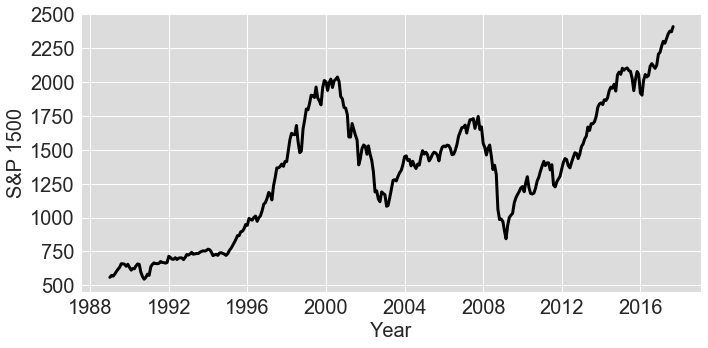

In [41]:
# plot monhtly S&P (adjusted to 2016)
fig = plt.figure(figsize = (10,5))
axes = fig.add_subplot(1, 1, 1, facecolor ='gainsboro')
axes.plot(pd.to_datetime(cpi_sp['Date']), cpi_sp['SP_to2016'], c = 'k', linewidth = 3)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('S&P 1500', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tight_layout()
plt.show()


In [42]:
fig.savefig('1_SP1500.png', dpi = 300)


In [43]:
# use S&P value relative to loan's approval date

cpi_sp.columns = [['ApprovalDate', 'CPI_to2016', 'SP_to2016']]

#merge loan data with CPI + S&P data 
#keep only the date and set it to first of the month in order to use CPI and SP data
loans_7a['ApprovalDate'] = loans_7a['ApprovalDate'].apply(lambda x:x.date())
loans_7a['ApprovalDate'] = loans_7a['ApprovalDate'].apply(lambda x: x.replace(day = 1)) 
loans_7a['ApprovalDate']  = pd.to_datetime(loans_7a['ApprovalDate'])
cpi_sp['ApprovalDate'] = pd.to_datetime(cpi_sp['ApprovalDate'])

In [44]:
loans_7a = pd.merge(loans_7a, cpi_sp, on = 'ApprovalDate', how = 'left')

In [45]:
loans_7a.head()

,BorrState,BankName,SBAGuaranteedApproval,ApprovalDate,ApprovalFiscalYear,FirstDisbursementDate,DeliveryMethod,subpgmdesc,TermInMonths,NaicsCode,BusinessType,LoanStatus,ChargeOffDate,GrossChargeOffAmount,RevolverStatus,JobsSupported,FranchiseCodeBin,CPI_to2016,SP_to2016
0,UT,Bank of the West,671360,1990-10-01,1991,1990-10-31,PLP,Guaranty,120,323121.0,PARTNERSHIP,PIF,NaT,0,0,0,0,1.77465,545.031
1,NH,MISSINGMAINBANKID,108000,1990-10-01,1991,NaT,CLP,Guaranty,240,421830.0,INDIVIDUAL,CANCLD,NaT,0,0,0,0,1.77465,545.031
2,FL,"TD Bank, National Association",170000,1990-10-01,1991,1991-01-31,OTH 7A,Guaranty,60,624310.0,CORPORATION,PIF,NaT,0,0,0,0,1.77465,545.031
3,SD,CorTrust Bank National Association,116200,1990-10-01,1991,1991-01-31,OTH 7A,Guaranty,180,442210.0,INDIVIDUAL,PIF,NaT,0,0,0,0,1.77465,545.031
4,IL,"Central Illinois Bank, A Branch of",280500,1990-10-01,1991,1990-10-31,OTH 7A,Guaranty,84,421990.0,CORPORATION,PIF,NaT,0,0,0,0,1.77465,545.031


In [46]:
# check for NaNs
loans_7a['SP_to2016'].isnull().sum()

0

In [47]:
# adjust dollar amounts to 2016 US Dollar value 
loans_7a['SBAGuaranteedApprovalAdj'] = loans_7a['SBAGuaranteedApproval'].multiply(loans_7a['CPI_to2016']).astype('float64')
loans_7a['GrossChargeOffAmountAdj'] = loans_7a['GrossChargeOffAmount'].multiply(loans_7a['CPI_to2016']).astype('float64')

In [48]:
loans_7a['JobsSupported'].value_counts().head()

0    333240
2    123504
1    102330
3     90921
4     87490
Name: JobsSupported, dtype: int64

In [49]:
loans_7a['JobsSupported'].value_counts()[0]/len(loans_7a)

0.26848319563001782

Jobs Supported = "Total Jobs Created + Jobs Retained as reported by lender on SBA Loan Application.  SBA does not review, audit, or validate these numbers - they are simply self-reported, good faith estimates by the lender."

26.8% of businesses are non-employers! 


In [50]:
# group data by approval fiscal year 
loans_7a_by_FY = loans_7a.groupby('ApprovalFiscalYear')

In [51]:
clrs    = ["#4878CF", "#6ACC65", "#D65F5F", "#B47CC7", "#C4AD66", "#77BEDB"]
newPal   = dict(PIF = clrs[0], DEFAULT = clrs[2], CANCLD = clrs[1], COMMIT = clrs[3], EXEMPT = clrs[4])


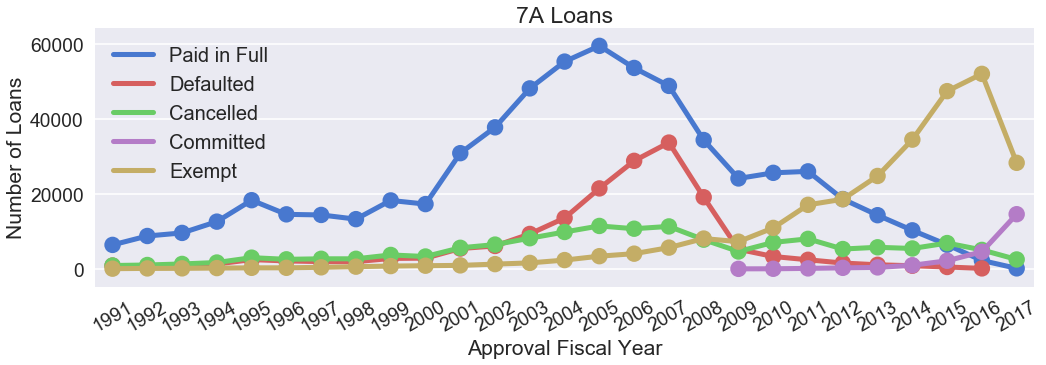

In [52]:
# get a sense of number of each Loan Status per approval year
sns.set_context('poster', font_scale = 1.2)

g = sns.factorplot(x ='ApprovalFiscalYear', y = 'SBAGuaranteedApprovalAdj',
            hue = 'LoanStatus', hue_order = ['PIF', 'DEFAULT', 'CANCLD', 'COMMIT', 'EXEMPT'],
                   kind = 'point', data = loans_7a, estimator = np.count_nonzero, 
               ci = None, size = 5, aspect = 3, palette = newPal, legend = False)

g.set_xticklabels(rotation = 30)

sns.plt.title('7A Loans')
sns.plt.xlabel('Approval Fiscal Year')
sns.plt.ylabel('Number of Loans')
sns.plt.legend(['Paid in Full', 'Defaulted', 'Cancelled', 'Committed', 'Exempt'], loc = 'best', fontsize = 20)


In [53]:
g.savefig('2_AllLoans_Counts_FY.png', dpi = 300)

In [54]:

loans_7a_by_FY = loans_7a.groupby('ApprovalFiscalYear')

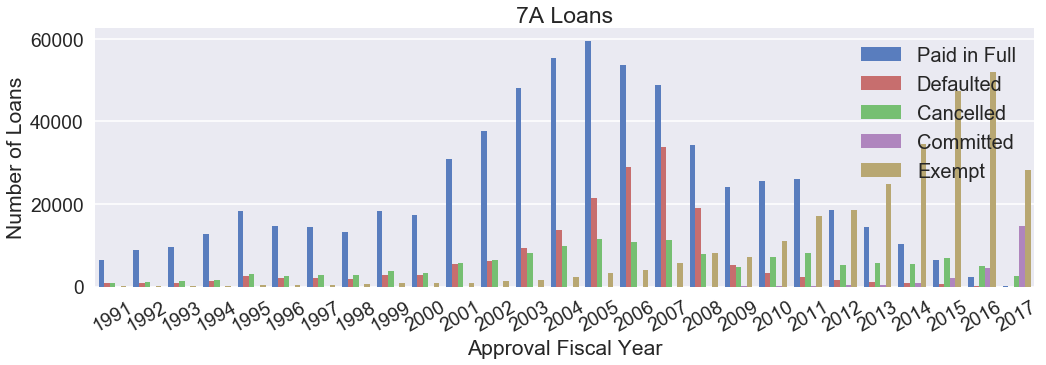

In [55]:
# get a sense of number of each Loan Status per approval year

sns.set_context('poster', font_scale = 1.2)


g = sns.factorplot(x ='ApprovalFiscalYear', y = 'SBAGuaranteedApprovalAdj',
            hue = 'LoanStatus', hue_order = ['PIF', 'DEFAULT', 'CANCLD', 'COMMIT', 'EXEMPT'],
                   kind = 'bar', data = loans_7a, estimator = np.count_nonzero, 
               ci = None, size = 5, aspect = 3, palette = newPal, legend = False)


g.set_xticklabels(rotation = 30)

sns.plt.title('7A Loans')
sns.plt.xlabel('Approval Fiscal Year')
sns.plt.ylabel('Number of Loans')
sns.plt.legend(['Paid in Full', 'Defaulted', 'Cancelled', 'Committed', 'Exempt'], loc = 'best', fontsize = 20)



The plot bellow shows the actual amounts paid in full and charged off each year. 

In [56]:
# group by year and loan status 
loans_7a_by_FY_by_LoanStatus = loans_7a.groupby(by = ['ApprovalFiscalYear', 'LoanStatus'], as_index = False).sum()

In [57]:
loans_7a_by_FY_by_LoanStatus.head()

,ApprovalFiscalYear,LoanStatus,SBAGuaranteedApproval,TermInMonths,NaicsCode,GrossChargeOffAmount,RevolverStatus,JobsSupported,FranchiseCodeBin,SBAGuaranteedApprovalAdj,GrossChargeOffAmountAdj
0,1991,CANCLD,161133219,115877,4.423785e+08,0,1,0,45,2.820334e+08,0.000000e+00
1,1991,DEFAULT,175799656,87780,4.045433e+08,108218977,0,0,38,3.083094e+08,1.897405e+08
2,1991,EXEMPT,10037760,7599,2.839959e+07,0,0,0,2,1.756865e+07,0.000000e+00
3,1991,PIF,1148843333,860704,3.107813e+09,0,3,0,235,2.011165e+09,0.000000e+00
4,1992,CANCLD,192405480,132171,5.085422e+08,0,4,0,40,3.269076e+08,0.000000e+00


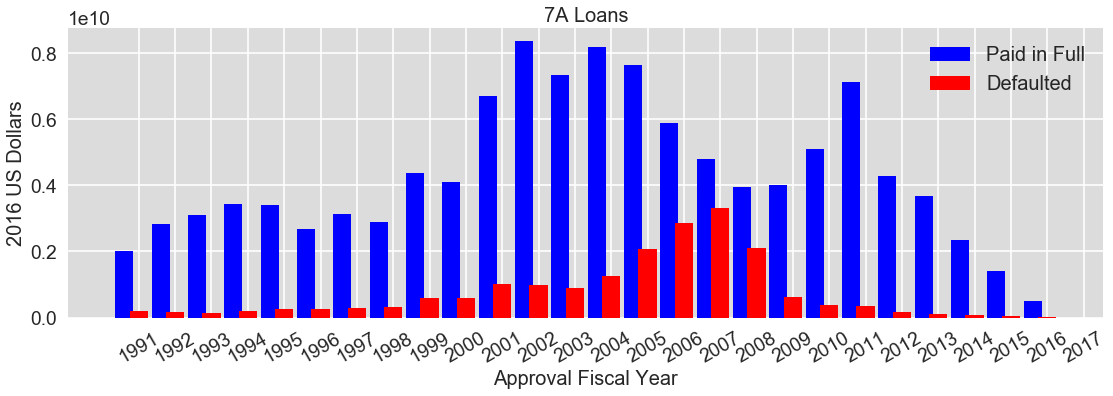

In [58]:
# plot amount paid in full and amount charged off per approval year 
fig = plt.figure(figsize = (16, 6))
ax = fig.add_subplot(1, 1, 1, facecolor ='gainsboro')

n_groups = loans_7a['ApprovalFiscalYear'].nunique()

sum_pif = loans_7a_by_FY_by_LoanStatus[loans_7a_by_FY_by_LoanStatus['LoanStatus']=='PIF']['SBAGuaranteedApprovalAdj']

sum_choff = loans_7a_by_FY_by_LoanStatus[loans_7a_by_FY_by_LoanStatus['LoanStatus']== 'DEFAULT']['GrossChargeOffAmountAdj']

x = np.arange(1991, 2017)

y = np.array(sum_pif)[:-1]
z = np.array(sum_choff)

ax.bar(x-0.4, y,width=0.5,color='b',align='center')
ax.bar(x, z,width=0.5,color='r',align='center')
plt.xlabel('Approval Fiscal Year', fontsize = 20)
plt.xticks(loans_7a['ApprovalFiscalYear'].unique(), rotation = 30)
plt.ylabel('2016 US Dollars', fontsize = 20)
plt.title('7A Loans', fontsize = 20)
plt.legend(labels = ['Paid in Full', 'Defaulted'], fontsize = 20)
plt.tight_layout()
plt.show()


In [59]:
fig.savefig('3_Completed_per_FY.png', dpi = 300)

In [60]:
# look at Maturity Date and only use loans whose maturity data has pased
loans_7a['MaturityDate'] = loans_7a['ApprovalDate'] + loans_7a['TermInMonths'].values.astype("timedelta64[M]")
loans_7a['MaturityYear'] = loans_7a['MaturityDate'].dt.year
loans_7a_matured = loans_7a[loans_7a['MaturityDate'] < '2017-07-01']


In [61]:
loans_7a_matured['MaturityYear'].isnull().sum()

0

In [62]:
loans_7a_matured.reset_index(inplace = True, drop = True)

In [63]:
loans_7a_matured.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755660 entries, 0 to 755659
Data columns (total 23 columns):
BorrState                   755658 non-null object
BankName                    755660 non-null object
SBAGuaranteedApproval       755660 non-null int64
ApprovalDate                755660 non-null datetime64[ns]
ApprovalFiscalYear          755660 non-null int64
FirstDisbursementDate       663929 non-null datetime64[ns]
DeliveryMethod              755657 non-null object
subpgmdesc                  755660 non-null object
TermInMonths                755660 non-null int64
NaicsCode                   755660 non-null float64
BusinessType                755619 non-null object
LoanStatus                  755660 non-null object
ChargeOffDate               158154 non-null datetime64[ns]
GrossChargeOffAmount        755660 non-null int64
RevolverStatus              755660 non-null int64
JobsSupported               755660 non-null int64
FranchiseCodeBin            755660 non-null int64
CPI_

In [64]:
# plot amount paid in full and amount charged off per approval year when looking at matured loans only 

n_groups = loans_7a_matured['ApprovalFiscalYear'].nunique()

loans_7a_by_AY_by_LoanStatus = loans_7a_matured.groupby(by = ['ApprovalFiscalYear', 'LoanStatus'], as_index = False).sum()

sum_pif = loans_7a_by_AY_by_LoanStatus[loans_7a_by_AY_by_LoanStatus['LoanStatus']=='PIF']['SBAGuaranteedApprovalAdj']

sum_def = loans_7a_by_AY_by_LoanStatus[loans_7a_by_AY_by_LoanStatus['LoanStatus']=='DEFAULT']['GrossChargeOffAmountAdj']


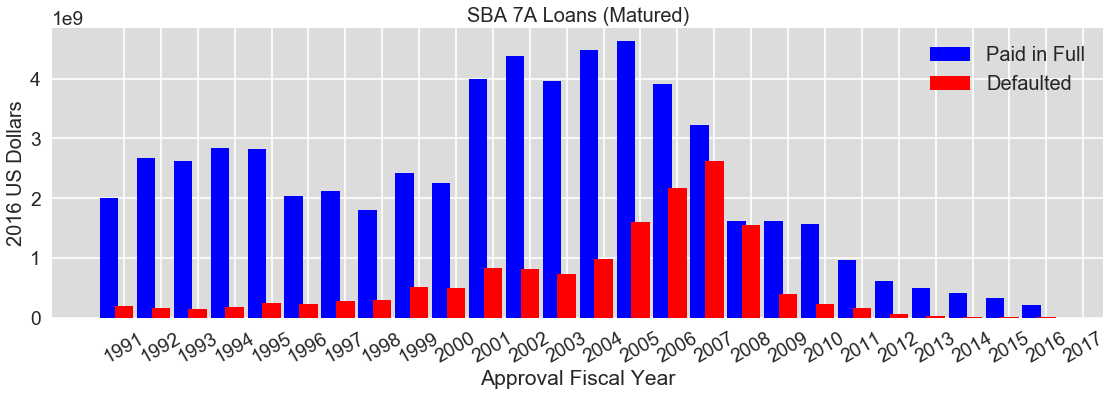

In [65]:
fig = plt.figure(figsize = (16, 6))
ax = fig.add_subplot(1, 1, 1, facecolor = "gainsboro")
sns.set_context('poster', font_scale = 1.2)


x = np.arange(1991, 2017)

y = np.array(sum_pif)[:-1]
z = np.array(sum_def)

ax.bar(x-0.4, y,width=0.5,color='b',align='center')
ax.bar(x, z,width=0.5,color='r',align='center')
plt.xlabel('Approval Fiscal Year')
plt.xticks(loans_7a_matured['ApprovalFiscalYear'].unique(), rotation = 30)
plt.ylabel('2016 US Dollars', fontsize = 20)
plt.title('SBA 7A Loans (Matured)', fontsize = 20)
plt.legend(labels = ['Paid in Full', 'Defaulted'], fontsize = 20)
plt.tight_layout()
plt.show()

In [66]:
fig.savefig('4_Matured_per_FY.png', dpi = 300)

In [67]:
loans_7a_matured['MaturityYear'].unique()

array([2000, 2010, 1995, 2005, 1997, 1991, 1992, 1996, 2003, 2015, 2008,
       2004, 1998, 2009, 1999, 2014, 2006, 1993, 2001, 1994, 2012, 1990,
       2016, 2002, 2007, 2011, 2013, 2017])

In [68]:
loans_7a_matured['NaicsCode'].nunique()

1338

In [69]:
loans_7a_matured['subpgmdesc'].value_counts()

FA$TRK (Small Loan Express)                               404241
Guaranty                                                  288276
Community Express                                          37730
Patriot Express                                             5086
Revolving Line of Credit Exports - Sec. 7(a) (14)           4192
Contract Guaranty                                           2853
International Trade - Sec, 7(a) (16)                        2556
Gulf Opportunity                                            2142
Standard Asset Based                                        1920
Rural Lender Advantage                                      1535
Seasonal Line of Credit                                     1285
Small Asset Based                                           1052
Lender Advantage Initiative                                  591
Small General Contractors - Sec. 7(a) (9)                    551
Greenline - Revolving L. of Cred. - Current Assets           510
Domestic Revolving Line o

In [70]:
# missing NAICS codes?
loans_7a_matured['NaicsCode'].isnull().sum()/len(loans_7a_matured)

0.0

### NAICS Codes may be grouped into 20 industry sectors 

In [71]:
code_groups = {'Agriculture': 11, 'Mining' : 21, 'Utilities' : 22,
'Construction' : 23, 'Manufacturing' : [31, 32, 33], 'Wholesale Trade' : 42,
'Retail Trade' : [44, 45], 'Transportation & Warehousing' : [48, 49],
'Information' : 51, 'Finance & Insurance' : 52, 
'Real Estate Rental & Leasing' : 53, 
'Professional, Scientific, & Technical Services' : 54,
'Management of Companies & Enterprises': 55,
'Administrative/Support/Waste Management' : 56,
'Educational Services' : 61,
'Health Care & Social Assistance' : 62,
'Arts, Entertainment, & Recreation' : 71,
'Accommodation & Food Services' : 72,
'Other Services' : 81,
'Public Administration' : 92}

In [72]:
# get the "Sector" variable from NAICS codes

# only the first two digits of NAICS code are relevant to group into 20 sectors
loans_7a_matured['Sector'] = (loans_7a_matured['NaicsCode'].apply(lambda x:x/10000))
loans_7a_matured['Sector'].fillna(0, inplace = True)
loans_7a_matured['Sector'] = (loans_7a_matured['Sector'].apply(int))


code_groups.values()

tmp = 0
list_codes = []
list_cat = []
for i in range(len(code_groups.values())):
    val = list(code_groups.values())[i]
    if type(val) == int:
        list_codes.append(val)
        list_cat.append(list(code_groups.keys())[i])
        
    else:
        for j in range(len(val)):
            list_codes.append(val[j])
            list_cat.append(list(code_groups.keys())[i])
        
code_cat = pd.DataFrame(list_codes, columns = ['Code'])
code_cat['Sector'] = list_cat
code_cat

cols = list(loans_7a_matured.columns)

cols[-1] = 'Code'

loans_7a_matured.columns = cols

loans_7a_matured = pd.merge(loans_7a_matured, code_cat, on = 'Code', how = 'left')

loans_7a_matured.head()


/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,BorrState,BankName,SBAGuaranteedApproval,ApprovalDate,ApprovalFiscalYear,FirstDisbursementDate,DeliveryMethod,subpgmdesc,TermInMonths,NaicsCode,...,JobsSupported,FranchiseCodeBin,CPI_to2016,SP_to2016,SBAGuaranteedApprovalAdj,GrossChargeOffAmountAdj,MaturityDate,MaturityYear,Code,Sector
0,UT,Bank of the West,671360,1990-10-01,1991,1990-10-31,PLP,Guaranty,120,323121.0,...,0,0,1.77465,545.031,1.191430e+06,0.0,2000-09-30 10:12:00,2000,32,Manufacturing
1,NH,MISSINGMAINBANKID,108000,1990-10-01,1991,NaT,CLP,Guaranty,240,421830.0,...,0,0,1.77465,545.031,1.916624e+05,0.0,2010-09-30 20:24:00,2010,42,Wholesale Trade
2,FL,"TD Bank, National Association",170000,1990-10-01,1991,1991-01-31,OTH 7A,Guaranty,60,624310.0,...,0,0,1.77465,545.031,3.016908e+05,0.0,1995-10-01 05:06:00,1995,62,Health Care & Social Assistance
3,SD,CorTrust Bank National Association,116200,1990-10-01,1991,1991-01-31,OTH 7A,Guaranty,180,442210.0,...,0,0,1.77465,545.031,2.062145e+05,0.0,2005-09-30 15:18:00,2005,44,Retail Trade
4,IL,"Central Illinois Bank, A Branch of",280500,1990-10-01,1991,1990-10-31,OTH 7A,Guaranty,84,421990.0,...,0,0,1.77465,545.031,4.977898e+05,0.0,1997-09-30 16:44:24,1997,42,Wholesale Trade


In [73]:
loans_7a_matured['Sector'].isnull().sum()

7

In [74]:
loans_7a_matured.dropna(subset = ['Sector'], inplace = True)

In [75]:
loans_7a_matured.reset_index(inplace = True, drop=True)

In [76]:
# keep only paid in full or defaulted loans
loans_7a_matured = loans_7a_matured[(loans_7a_matured['LoanStatus']=='PIF') | 
                                                             (loans_7a_matured['LoanStatus']=='DEFAULT')]

In [77]:
by_sector = loans_7a_matured.groupby('Sector').sum()

In [78]:
by_sector.head()

,SBAGuaranteedApproval,ApprovalFiscalYear,TermInMonths,NaicsCode,GrossChargeOffAmount,RevolverStatus,JobsSupported,FranchiseCodeBin,SBAGuaranteedApprovalAdj,GrossChargeOffAmountAdj,MaturityYear,Code
Sector,,,,,,,,,,,,
Accommodation & Food Services,6004734098,119267043,4768187,4.296205e+10,1817428021,11963,751018,12721,7.498952e+09,2.196629e+09,119646986,4283424
Administrative/Support/Waste Management,1950027704,67847434,2331275,1.901068e+10,436594187,13673,321284,1929,2.450614e+09,5.266983e+08,68032112,1895320
Agriculture,1409228337,16150594,803146,9.125816e+08,176757041,932,22335,7,2.023685e+09,2.379037e+08,16215308,88803
"Arts, Entertainment, & Recreation",1320386479,26932229,1103091,9.590061e+09,307113658,3250,86409,1296,1.797776e+09,3.855993e+08,27020250,954453
Construction,4759155784,131253767,4354561,1.551183e+10,1096864025,29646,462572,537,6.208953e+09,1.345566e+09,131598158,1506316


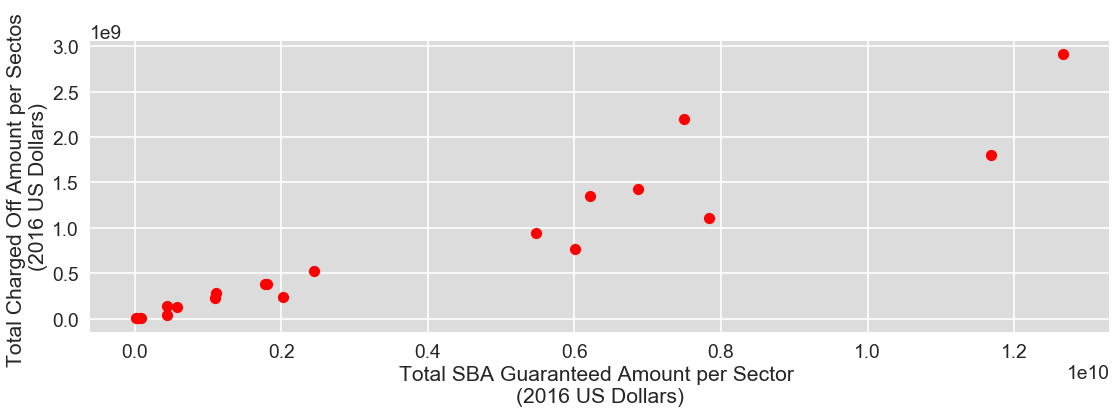

In [79]:
fig = plt.figure(figsize=(16,6))
axes = fig.add_subplot(1, 1, 1, facecolor = 'gainsboro')
axes.plot(by_sector['SBAGuaranteedApprovalAdj'], by_sector['GrossChargeOffAmountAdj'], 'ro')
plt.xlabel('Total SBA Guaranteed Amount per Sector \n(2016 US Dollars)')
plt.ylabel('Total Charged Off Amount per Sectos \n(2016 US Dollars)')
plt.tight_layout()


In [80]:
by_sector.reset_index(inplace = True)

In [81]:
by_sector['Percent Defaulted'] = (by_sector['GrossChargeOffAmountAdj']/ by_sector['SBAGuaranteedApprovalAdj'])*100

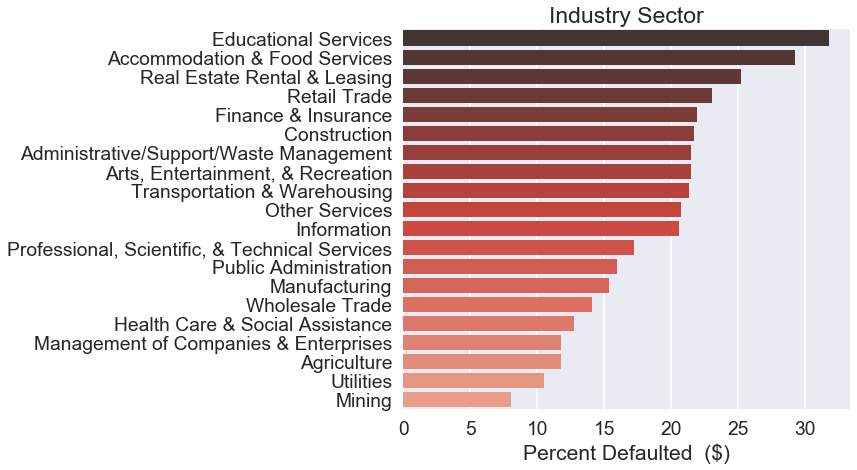

In [82]:
sns.set_context('poster', font_scale = 1.2)

# initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 7))

pco = by_sector.sort_values("Percent Defaulted", ascending=False)

# plot the total % defaulted (in dollars)
sns.set_color_codes("pastel")
sns.barplot(y = "Sector", x = "Percent Defaulted", data=pco, palette="Reds_d")
ax.set_xlabel('Percent Defaulted  ($)')
ax.set_ylabel('')

ax.set_title('Industry Sector')



In [83]:
by_sector_ct = loans_7a_matured.groupby('Sector').agg(lambda ts: (ts > 0).sum()) 

In [84]:
by_sector_ct.reset_index(inplace = True)

In [85]:
by_sector_ct['Percent Defaulted'] = (by_sector_ct['GrossChargeOffAmountAdj']/ by_sector_ct['SBAGuaranteedApprovalAdj'])*100

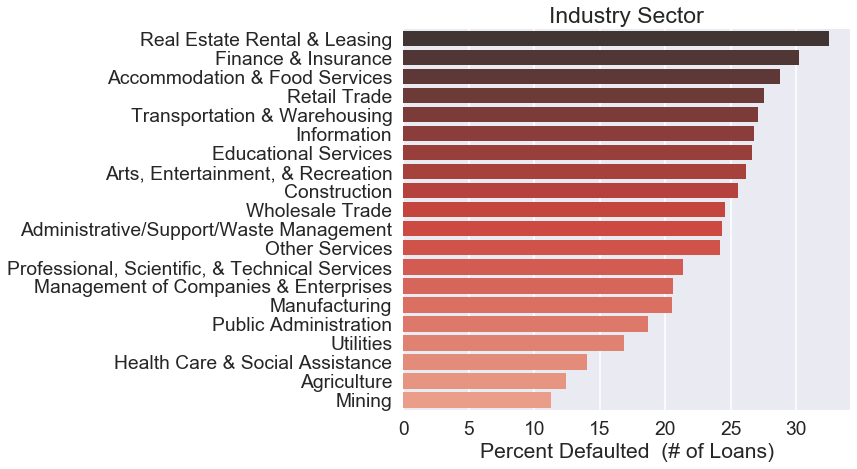

In [86]:
sns.set_context('poster', font_scale = 1.2)

# initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 7))

pco = by_sector_ct.sort_values("Percent Defaulted", ascending=False)

# plot the total percent defaulted (in number of loans)
sns.set_color_codes("pastel")
sns.barplot(y="Sector", x= "Percent Defaulted", data=pco, palette="Reds_d")
ax.set_xlabel('Percent Defaulted  (# of Loans)')

ax.set_ylabel('')
ax.set_title('Industry Sector')


In [87]:
f.savefig('Sector.png', dpi = 300)

In [88]:
#Get states 

borr_states = set(loans_7a_matured['BorrState'].unique())

states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

#US teritories 
borr_states.difference(states)

#Count all the "odd" ones (not one of 50 states)
for s in borr_states.difference(states):
   print((loans_7a_matured['BorrState'] == s).sum())

#PR has 9834 loans, all others < 1000

print((loans_7a_matured['BorrState']).isnull().sum())



0
3
199
606
7
2
8132
19
12
1
2
2


In [89]:
#Number of nans for states
print((loans_7a_matured['BorrState']).isnull().sum())


#Drop the territories except for PR

for s in {'FM', 'MP', 'GU', 'MH', 'PW', 'AE', 'VI', 'AS', 'TQ'}:
     loans_7a_matured = loans_7a_matured[loans_7a_matured['BorrState'] != s]   


#Drop the nans
loans_7a_matured = loans_7a_matured[loans_7a_matured['BorrState'].notnull()]


2


In [90]:
loans_7a_matured.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 650263 entries, 0 to 755647
Data columns (total 25 columns):
BorrState                   650263 non-null object
BankName                    650263 non-null object
SBAGuaranteedApproval       650263 non-null int64
ApprovalDate                650263 non-null datetime64[ns]
ApprovalFiscalYear          650263 non-null int64
FirstDisbursementDate       648495 non-null datetime64[ns]
DeliveryMethod              650261 non-null object
subpgmdesc                  650263 non-null object
TermInMonths                650263 non-null int64
NaicsCode                   650263 non-null float64
BusinessType                650227 non-null object
LoanStatus                  650263 non-null object
ChargeOffDate               158036 non-null datetime64[ns]
GrossChargeOffAmount        650263 non-null int64
RevolverStatus              650263 non-null int64
JobsSupported               650263 non-null int64
FranchiseCodeBin            650263 non-null int64
CPI_

### For categorical variables, we will use one-hot encoding

In [91]:
#One-hot encoding: state, year approved, category, business type, loan tatus
loans_7a_matured = pd.concat([loans_7a_matured, pd.get_dummies(loans_7a_matured['BorrState'], drop_first=True)], axis  = 1)
loans_7a_matured = pd.concat([loans_7a_matured, pd.get_dummies(loans_7a_matured['Sector'], drop_first=True)], axis  = 1)
loans_7a_matured = pd.concat([loans_7a_matured, pd.get_dummies(loans_7a_matured['LoanStatus'], drop_first = True)], axis  = 1)
loans_7a_matured = pd.concat([loans_7a_matured, pd.get_dummies(loans_7a_matured['BusinessType'], drop_first = True)], axis  = 1)
loans_7a_matured = pd.concat([loans_7a_matured, pd.get_dummies(loans_7a_matured['ApprovalFiscalYear'], drop_first = True)], axis  = 1)


In [92]:
list(loans_7a_matured.columns)

['BorrState',
 'BankName',
 'SBAGuaranteedApproval',
 'ApprovalDate',
 'ApprovalFiscalYear',
 'FirstDisbursementDate',
 'DeliveryMethod',
 'subpgmdesc',
 'TermInMonths',
 'NaicsCode',
 'BusinessType',
 'LoanStatus',
 'ChargeOffDate',
 'GrossChargeOffAmount',
 'RevolverStatus',
 'JobsSupported',
 'FranchiseCodeBin',
 'CPI_to2016',
 'SP_to2016',
 'SBAGuaranteedApprovalAdj',
 'GrossChargeOffAmountAdj',
 'MaturityDate',
 'MaturityYear',
 'Code',
 'Sector',
 'AL',
 'AR',
 'AZ',
 'CA',
 'CO',
 'CT',
 'DC',
 'DE',
 'FL',
 'GA',
 'HI',
 'IA',
 'ID',
 'IL',
 'IN',
 'KS',
 'KY',
 'LA',
 'MA',
 'MD',
 'ME',
 'MI',
 'MN',
 'MO',
 'MS',
 'MT',
 'NC',
 'ND',
 'NE',
 'NH',
 'NJ',
 'NM',
 'NV',
 'NY',
 'OH',
 'OK',
 'OR',
 'PA',
 'PR',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'UT',
 'VA',
 'VT',
 'WA',
 'WI',
 'WV',
 'WY',
 'Administrative/Support/Waste Management',
 'Agriculture',
 'Arts, Entertainment, & Recreation',
 'Construction',
 'Educational Services',
 'Finance & Insurance',
 'Health Care & Social

In [93]:
loans_7a_matured.reset_index(inplace = True, drop = True)

In [94]:
loans_7a_matured.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650263 entries, 0 to 650262
Columns: 124 entries, BorrState to 2017
dtypes: datetime64[ns](4), float64(3), int64(9), object(9), uint8(99)
memory usage: 185.4+ MB


In [95]:
list(loans_7a_matured.columns)

['BorrState',
 'BankName',
 'SBAGuaranteedApproval',
 'ApprovalDate',
 'ApprovalFiscalYear',
 'FirstDisbursementDate',
 'DeliveryMethod',
 'subpgmdesc',
 'TermInMonths',
 'NaicsCode',
 'BusinessType',
 'LoanStatus',
 'ChargeOffDate',
 'GrossChargeOffAmount',
 'RevolverStatus',
 'JobsSupported',
 'FranchiseCodeBin',
 'CPI_to2016',
 'SP_to2016',
 'SBAGuaranteedApprovalAdj',
 'GrossChargeOffAmountAdj',
 'MaturityDate',
 'MaturityYear',
 'Code',
 'Sector',
 'AL',
 'AR',
 'AZ',
 'CA',
 'CO',
 'CT',
 'DC',
 'DE',
 'FL',
 'GA',
 'HI',
 'IA',
 'ID',
 'IL',
 'IN',
 'KS',
 'KY',
 'LA',
 'MA',
 'MD',
 'ME',
 'MI',
 'MN',
 'MO',
 'MS',
 'MT',
 'NC',
 'ND',
 'NE',
 'NH',
 'NJ',
 'NM',
 'NV',
 'NY',
 'OH',
 'OK',
 'OR',
 'PA',
 'PR',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'UT',
 'VA',
 'VT',
 'WA',
 'WI',
 'WV',
 'WY',
 'Administrative/Support/Waste Management',
 'Agriculture',
 'Arts, Entertainment, & Recreation',
 'Construction',
 'Educational Services',
 'Finance & Insurance',
 'Health Care & Social

In [96]:
#Drop those columns that we won't use in the model
loans_7a_matured.drop(['BorrState', 'BankName', 'ApprovalDate', 'SBAGuaranteedApproval', 'ApprovalFiscalYear', 
           'GrossChargeOffAmount',
           'FirstDisbursementDate', 'DeliveryMethod','subpgmdesc', 'NaicsCode', 'BusinessType', 'LoanStatus',
           'ChargeOffDate', 'CPI_to2016', 'MaturityDate', 'MaturityYear', 'Code', 'Sector' ], axis = 1, inplace = True)

In [97]:
#Save for later use
pd.to_pickle(loans_7a_matured, 'loans_7a_matured')